In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

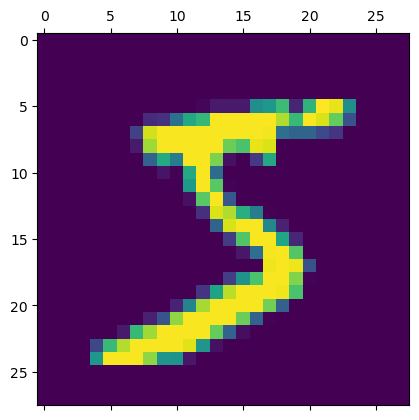

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape

(60000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

In [21]:
X_train=X_train/255
X_test = X_test/255

In [22]:
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)

In [23]:
X_train_flattened.shape

(60000, 784)

In [24]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4648 - accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2826 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9257


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9260


[0.267307311296463, 0.9259999990463257]

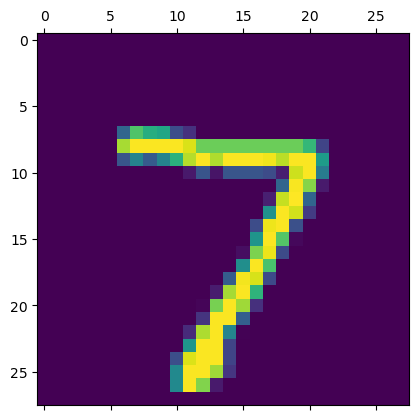

In [27]:
plt.matshow(X_test[0])

In [29]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 929us/step


In [30]:
y_predicted[0]

array([2.7263001e-02, 2.6584271e-07, 5.4355990e-02, 9.4756031e-01,
       2.7334497e-03, 8.5400298e-02, 1.4429629e-06, 9.9967128e-01,
       7.4848592e-02, 5.9247500e-01], dtype=float32)

In [31]:
np.argmax(y_predicted[0])

7

In [32]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [33]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,    9,  928,   19,    9,    3,   13,    8,   34,    4],
       [   3,    0,   20,  928,    1,   21,    2,    8,   18,    9],
       [   2,    1,    4,    2,  919,    0,    9,    3,    7,   35],
       [  11,    3,    4,   37,   10,  780,   12,    4,   24,    7],
       [  13,    3,    5,    1,    7,   12,  914,    2,    1,    0],
       [   2,    6,   24,    8,    9,    1,    0,  937,    2,   39],
       [  10,    9,    7,   32,    9,   32,    9,    8,  849,    9],
       [  11,    7,    1,   13,   29,    6,    0,   14,    4,  924]])>

Text(95.72222222222221, 0.5, 'Truth')

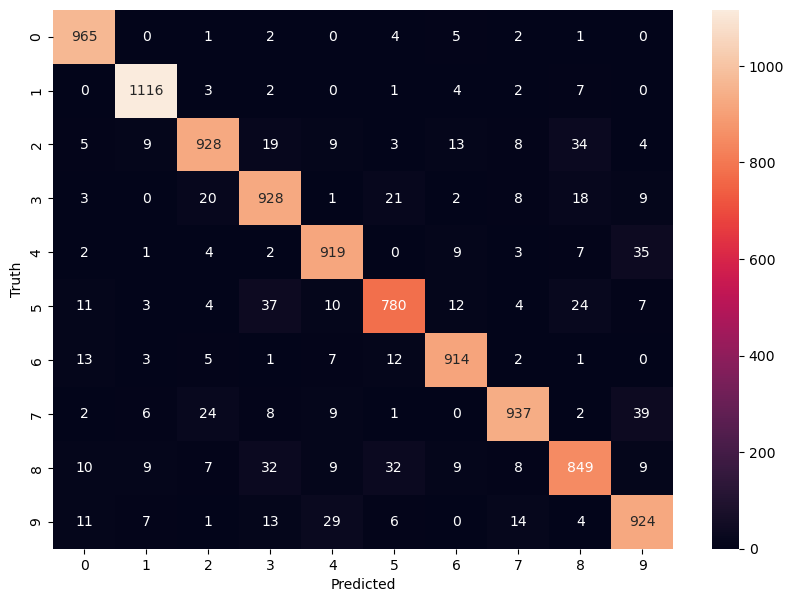

In [35]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model = keras.Sequential([
    keras.layers.Dense(382, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2132 - accuracy: 0.9374
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0852 - accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0552 - accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0380 - accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0290 - accuracy: 0.9908


In [41]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9793


[0.06998012214899063, 0.9793000221252441]

In [42]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    0,    1,    0,    2,    1,    4,    1,    0,    1],
       [   1, 1122,    2,    3,    0,    0,    3,    0,    4,    0],
       [   5,    0, 1006,    3,    3,    0,    8,    4,    3,    0],
       [   0,    0,    7,  997,    0,    3,    0,    1,    1,    1],
       [   2,    0,    1,    0,  962,    1,    7,    1,    0,    8],
       [   1,    0,    0,   13,    0,  870,    6,    0,    1,    1],
       [   0,    3,    0,    0,    4,    4,  946,    0,    1,    0],
       [   2,    4,   11,    2,    1,    0,    0,  998,    5,    5],
       [   9,    0,    2,    7,    2,    3,    2,    2,  945,    2],
       [   2,    2,    0,    8,    9,    2,    1,    7,    1,  977]])>

Text(95.72222222222221, 0.5, 'Truth')

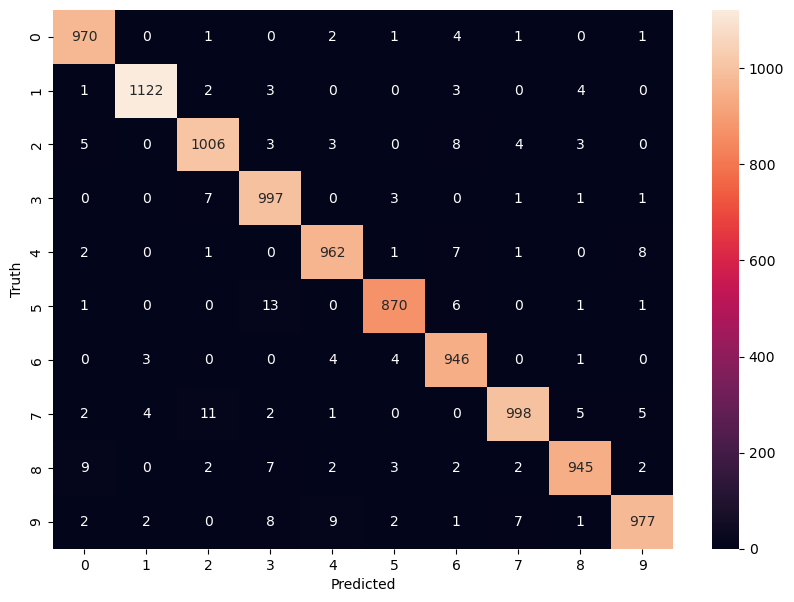

In [45]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28*28)),
    keras.layers.Dense(382, activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)